# Questions to ask

1. Who are the loyal customers?
2. Who have highest sales?
3. Who have highest probability of restock (buying) product?
4. Who buy the highest quantity?
5. Most bought product?
6. Which month give highest sales (highest number of people restock)?
7. Which location bring highest sales?
8. Why does each master_id have a number of retailer name and distributor name?
9. Market basket analysis --> Most likely product to buy together
10. Each product should have unique id, price, name 
11. Does each order_id have multiple retailer and distributor?
12. Any irrelevant features?
13. Which retailer have customer that cancelled order?
14. Which retailer have history of cancelling master order?



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read data

In [2]:
credit = pd.read_excel('C:/Users/Acer/Desktop/Data Science/LIVE PROJECT/CreditAnalysis_data.xlsx')
credit.head()

,Unnamed: 0,master_order_id,master_order_status,created,order_id,order_status,ordereditem_quantity,prod_names,ordereditem_unit_price_net,ordereditem_product_id,value,group,dist_names,retailer_names,bill_amount
0,1,25651,delivered,12/18/2017 10:41,25651,delivered,5,ProdName1,43.00,1744.0,215.00,Hyderabad,DistName1,RetailerID2,809.0
1,2,25651,delivered,12/18/2017 10:41,25651,delivered,5,ProdName2,35.54,965.0,177.70,Hyderabad,DistName1,RetailerID2,809.0
2,3,25651,delivered,12/18/2017 10:41,25651,delivered,2,ProdName3,52.80,705.0,105.60,Hyderabad,DistName3,RetailerID29,809.0
3,4,25651,delivered,12/18/2017 10:41,25651,delivered,2,ProdName4,118.28,264.0,236.56,Hyderabad,DistName1,RetailerID87,809.0
4,5,25651,delivered,12/18/2017 10:41,25651,delivered,3,ProdName5,32.22,1025.0,96.66,Hyderabad,DistName4,RetailerID118,809.0


We remove all the unnecessary information decided earlier and save into `clean_credit`.

In [3]:
clean_credit = credit.drop([953,  3655,  5657,  6451,  6455,  6913,  7255,  7296,  8045,
             8989,  9004,  9019,  9041,  9378,  9565, 10558, 11411, 15305,
            15327], axis=0)

In [4]:
clean_credit = clean_credit.drop(['ordereditem_product_id','dist_names','order_id','order_status'], axis=1)

In [ ]:
clean_credit.head()

In [4]:
clean_credit = clean_credit[(clean_credit['master_order_status'] != 'cancelled') & (clean_credit['master_order_status'] != 'rejected')]

All missing values have been handled. Unnecessary rows are removed (rejected, cancelled and new orders).

Since `master_order_id` not unique to each retailers, so we have to create a new column with order id unique to each retailers:

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clean_credit['dummy_name'] = le.fit_transform(clean_credit.retailer_names.values)
clean_credit['dummy_group'] = le.fit_transform(clean_credit.group.values)
clean_credit['invoice_id'] = clean_credit.dummy_group.astype(str) + clean_credit.dummy_name.astype(str) + clean_credit.master_order_id.astype(str)


In [6]:
clean_credit.head(10)

,Unnamed: 0,master_order_id,master_order_status,created,order_id,order_status,ordereditem_quantity,prod_names,ordereditem_unit_price_net,ordereditem_product_id,value,group,dist_names,retailer_names,bill_amount,dummy_name,dummy_group,invoice_id
0,1,25651,delivered,12/18/2017 10:41,25651,delivered,5,ProdName1,43.00,1744.0,215.00,Hyderabad,DistName1,RetailerID2,809.0,99,2,29925651
1,2,25651,delivered,12/18/2017 10:41,25651,delivered,5,ProdName2,35.54,965.0,177.70,Hyderabad,DistName1,RetailerID2,809.0,99,2,29925651
2,3,25651,delivered,12/18/2017 10:41,25651,delivered,2,ProdName3,52.80,705.0,105.60,Hyderabad,DistName3,RetailerID29,809.0,141,2,214125651
3,4,25651,delivered,12/18/2017 10:41,25651,delivered,2,ProdName4,118.28,264.0,236.56,Hyderabad,DistName1,RetailerID87,809.0,202,2,220225651
4,5,25651,delivered,12/18/2017 10:41,25651,delivered,3,ProdName5,32.22,1025.0,96.66,Hyderabad,DistName4,RetailerID118,809.0,16,2,21625651
5,6,25651,delivered,12/18/2017 10:41,25651,delivered,2,ProdName6,12.60,NaN,25.20,Hyderabad,DistName7,RetailerID112,809.0,11,2,21125651
6,7,25652,delivered,12/19/2017 6:48,25652,delivered,2,ProdName7,107.86,5192.0,215.72,Hyderabad,DistName1,RetailerID116,566.0,14,2,21425652
7,8,25652,delivered,12/19/2017 6:48,25652,delivered,3,ProdName8,31.25,5452.0,93.75,Hyderabad,DistName6,RetailerID55,566.0,170,2,217025652
8,9,25652,delivered,12/19/2017 6:48,25652,delivered,2,ProdName9,61.88,4383.0,123.76,Hyderabad,DistName1,RetailerID13,566.0,27,2,22725652
9,10,25654,delivered,12/19/2017 7:57,25654,delivered,5,ProdName10,19.44,922.0,97.20,Hyderabad,DistName1,RetailerID56,468.0,171,2,217125654


# RFM Analysis

Since there are only 215 retailers in the dataset, this means that there are retailers ordering items from several locations. Thus the duplications. We assume that several retailers have outlets in few other locations.

In [ ]:
pd.pivot_table(clean_credit, index = 'retailer_names', columns = 'group' , values = 'created', aggfunc ='count')


If we consider one location for each retailers, we get the same output where majority of orders come from Hyderabad, followed by Gurugram and then Delhi-West

In [ ]:
# Checking categorical data from df.Country
# unique, counts = np.unique(df.Country, return_counts=True)
# print(dict(zip(unique, counts)))
country_set = clean_credit[['group', 'invoice_id']]
country_set = country_set.pivot_table(columns='group', aggfunc='count')
country_set.sort_values('invoice_id', axis=1, ascending=False).T

In [ ]:
# Plotting InvoiceNo distribution per Country
plt.figure(figsize=(14,6))
plt.title('Distribuition of orders according to Locations');
sns.countplot(y='group', data=clean_credit);

### How are the sales from each group?

## Frequent sets and association rules with apriori:

This analysis requires that all the data for a transaction be included in 1 row and the items should be 1-hot encoded. Since we can't use this data the way it is, we got to further convert this into a format that is accepted by Apriori algorithm.

### Convert order data into format expected by the association rules function

#### Hyderabad

In [ ]:
basket_h = (df_Hyderabad
        .groupby(['invoice_id', 'prod_names'])['ordereditem_quantity']
                .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_id'))

In [ ]:
basket_h

In [ ]:
# complete the one-hot encoding, anything> 0 --> 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket_h_sets = basket_h.applymap(encode_units)

In [ ]:
basket_h_sets

### Association Rules 

#### Calculate support, confidence and lift

#### - Hyderabad

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#we can generate frequent item sets that have a support of at least 10 occurence in 10000 transactions
frequent_itemsets_h = apriori(basket_h_sets, min_support=0.001, use_colnames=True)
frequent_itemsets_h.sort_values('support', ascending = False, inplace=True)

In [ ]:
frequent_itemsets_h

In [ ]:
#generate the rules with their corresponding support, confidence and lift
#rules_h = association_rules(frequent_itemsets_h, metric="lift", min_threshold=1)
rules_h = association_rules(frequent_itemsets_h, metric="lift")
rules_h.head()

#In this case, look for a large lift (6) and high confidence (.8):
#rules_h[ (rules_h['lift'] >= 6) &
     #  (rules_h['confidence'] >= 0.8) ]


In Hyderabad group, there are no itemsets with significant support:

In [ ]:
import matplotlib.pyplot as plt
colors = ["red","green","blue","black","yellow","magenta","cyan", "pink","orange","brown"]
plt.bar(x = list(range(1,21)), height = frequent_itemsets_h.support[1:21], color=colors)
plt.xticks(list(range(1,21)),frequent_itemsets_h.itemsets[1:21],rotation = 45)
plt.xlabel('item-sets');plt.ylabel('support')
#plt.xticks(rotation = 45)

## Calculate RFM Metrics

In [7]:
# Let's observe the last transaction date.
# So we can determine the performans/measurement date for calculating how recent retailer's latest purchase was.
clean_credit['created'] = pd.to_datetime(clean_credit['created'])
clean_credit['created'].max()
clean_credit['created'].min()

Timestamp('2017-12-18 10:41:00')

In [ ]:
clean_credit['created'].describe()

In [8]:
import datetime as dt
from datetime import timedelta
#from data_prep import *
#from eda import *

Paling lama retailer yg x restock ada 350 hari (lowest recency):

In [ ]:
clean_credit['created'].max() - clean_credit['created'].min()

In [ ]:
clean_credit

In [9]:
clean_credit['created_year'] = clean_credit['created'].dt.year
clean_credit['created_month'] = clean_credit['created'].dt.month
clean_credit['created_hour'] = clean_credit['created'].dt.hour
clean_credit['created_year_month'] = (
    clean_credit['created'].dt.year.astype('str') + '_' +
    clean_credit['created'].dt.month.astype('str').str.zfill(2)
)
clean_credit['created_dayofweek'] = clean_credit['created'].dt.dayofweek

In [ ]:
clean_credit.head()

- Calculating Recency: 
For each customer ID, we need to calculate the days since the last transaction.
To calculate Days Since Last Transaction, a hypothetical date (Maximum Date + 2) is created to make it seem like we are working on the data 2 days after it was extracted.
Finally, the difference between the Maximum InvoiceDate for each customer and the hypothetical Date created gives us the Date Since the last transaction.

In [10]:
# Assign "performans_date" as 2 days after the last transaction date of purchase:

performans_date = clean_credit["created"].max() + timedelta(days=2)
performans_date

Timestamp('2018-12-05 18:26:00')

In [ ]:
# create excel writer object
writer = pd.ExcelWriter('customer_abs.xlsx')
# write dataframe to excel
customer_data.to_excel(writer)
# save the excel
writer.save()

Let's create a new dataframe called `customer_data` for calculating Recency, Frequency and Monetary values.
1. Recency : the number of days between performans_date and the last purchase date of each retailer.
2. Frequency: the number of transactions of each retailer.
3. Monetary : the sum of TotalPrice of each retailer.

### Assigning RFM Scores

- RFM analysis numerically scale each of these three categories for each customer 1 to 5. This is the higher the number, the better the result. The "Best" customer would receive a top score in every category whereas for Receny score, this is the opposite, because the most valueable customer is that has recently made purchasing so Recency score is labeled as 1.

- The max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score should be given as 5 to represent best customers.

## RFM Analysis

In [11]:
# Aggregate at customer level
customer_data = pd.DataFrame(clean_credit.pivot_table(index="retailer_names", 
                values=["created", "bill_amount",'invoice_id'], 
            aggfunc={"created": [min, max], "bill_amount": sum, 'invoice_id':pd.Series.nunique}))



customer_data.head()

bill_amount             created                     invoice_id
                       sum                 max                 min    nunique
retailer_names                                                               
RetailerID1      421557.97 2018-12-03 16:52:00 2018-01-02 06:56:00        189
RetailerID10      68787.08 2018-12-03 06:54:00 2018-01-23 06:30:00         36
RetailerID100    107256.37 2018-12-02 08:01:00 2018-01-03 05:53:00         57
RetailerID101    574727.13 2018-12-03 15:33:00 2017-12-19 07:31:00        265
RetailerID102     35524.84 2018-11-03 13:57:00 2018-01-30 06:51:00         14

In [12]:
# Rename columns
customer_data.columns = ["MonetaryValue", "LastInvoiceDate", "FirstInvoiceDate", "Frequency"]
#customer_data.columns = ["LastInvoiceDate", "FirstInvoiceDate", "Frequency", "MonetaryValue"]
customer_data.head()

,MonetaryValue,LastInvoiceDate,FirstInvoiceDate,Frequency
retailer_names,,,,
RetailerID1,421557.97,2018-12-03 16:52:00,2018-01-02 06:56:00,189
RetailerID10,68787.08,2018-12-03 06:54:00,2018-01-23 06:30:00,36
RetailerID100,107256.37,2018-12-02 08:01:00,2018-01-03 05:53:00,57
RetailerID101,574727.13,2018-12-03 15:33:00,2017-12-19 07:31:00,265
RetailerID102,35524.84,2018-11-03 13:57:00,2018-01-30 06:51:00,14


In [ ]:
customer_data

In [ ]:
performans_date

<AxesSubplot:>

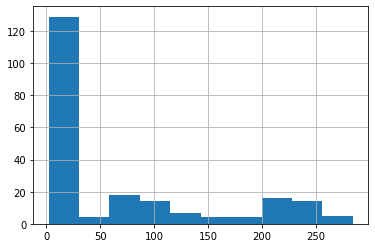

In [13]:
# Calculate recency: the interval (days) between the last transation day and today
customer_data["Recency"] = (performans_date - customer_data["LastInvoiceDate"]) / np.timedelta64(1, 'D')

customer_data["Recency"].hist()

In [ ]:
#customer_data["Frequency"].hist()

sns.distplot( customer_data["MonetaryValue"] , color="darkblue")
print("Skewness: %f" % customer_data["MonetaryValue"].skew())
print("Kurtosis: %f" % customer_data["MonetaryValue"].kurt())


<AxesSubplot:>

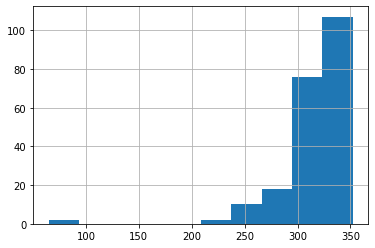

In [14]:
# Calculate retailer lifetime: the interval (days) between the first transaction day and today
customer_data["Lifetime"] = (performans_date - customer_data["FirstInvoiceDate"]) / np.timedelta64(1, 'D')

customer_data["Lifetime"].hist()

In [ ]:
plt.boxplot(customer_data.Lifetime) 

In [ ]:
customer_data["Frequency"].hist()

In [ ]:
#customer_data[customer_data["Frequency"] > 1000]
customer_data[customer_data["MonetaryValue"] >np.percentile(customer_data["MonetaryValue"], 99.5)]

In [ ]:
customer_data["MonetaryValue"].describe() 

In [ ]:
sns.displot(customer_data, x="Lifetime", kind="kde", bw_adjust=2)

In [ ]:
customer_data.loc[customer_data["Lifetime"] < 100]
# only 2 new customers (below 100 days) but only 1 transaction (frequency)
# average lifetime is 318 days
# 34 customers lifetime slightly below average, so not really considered as new customers, just low frequency
# group low engagement and low value (frequency >= 2 sampai 18 - 43(max)

In [ ]:
customer_data = customer_data[customer_data["Lifetime"] > 100]

<AxesSubplot:>

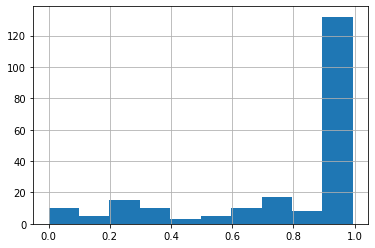

In [15]:
# Calculate the relative recency: recency / customer lifetime
# Note: this is to normalise the fact that newer customers have lower lifetime and thus lower recency
# by nature.
customer_data["RelRecency"] = 1 - customer_data["Recency"] / customer_data["Lifetime"]
customer_data["RelRecency"].hist()

In [ ]:
customer_data["Recency"].describe()

In [ ]:
customer_data["RelRecency"].describe()

In [ ]:
customer_data["RelRecency"].hist()

In [ ]:
sum(customer_data["RelRecency"]==0) / len(customer_data)
# This shows that 2.8% customers --> around 6 retailers only had one transactions.

In [ ]:
customer_data.loc[customer_data["RelRecency"]==0]

In [16]:
# Calculate the relative frequency: frequency / customer lifetime
# Note: this is to normalise the fact that newer customers have lower lifetime and thus lower frequency
# by nature.
customer_data["RelFrequency"] = customer_data["Frequency"] / customer_data["Lifetime"]
customer_data["RelFrequency"].apply(lambda x: np.isinf(x)).value_counts()
# No record with inifinity value  --> No zero recency/zero lifetime

False    215
Name: RelFrequency, dtype: int64

<AxesSubplot:>

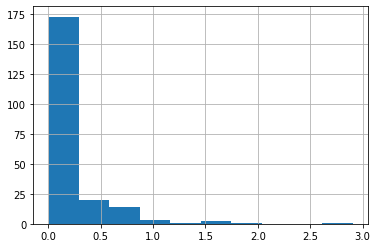

In [17]:
customer_data = customer_data[customer_data["RelFrequency"].apply(lambda x: np.isinf(x))==False]
customer_data["RelFrequency"].hist()
# There are some outliers in terms of frequency

In [ ]:
customer_data["RelFrequency"].describe()

In [ ]:
customer_data["MonetaryValue"].describe()

In [ ]:
customer_data["MonetaryValue"].hist()
# There are some outliers in terms of monetary value.

In [ ]:
#np.percentile(customer_data["MonetaryValue"], 50) # give median of monetary value
np.percentile(customer_data["MonetaryValue"], 99.5) # give 99th percentile of monetary value ==> 1.7e+06
# The 99% percentile of monetary value is 1.7e+06, i.e., 0.5% * 215 = 2 retailers have value higher than 1.7e+06.
# We should exclude these outliers from our analysis.

In [ ]:
customer_data = customer_data[customer_data["MonetaryValue"]<=np.percentile(customer_data["MonetaryValue"], 99.5)]

In [ ]:
len(customer_data)

<AxesSubplot:>

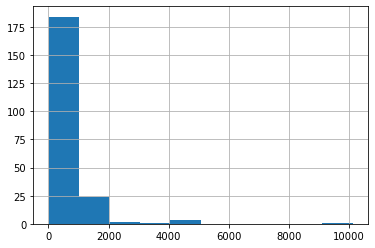

In [18]:
customer_data["RelMonetaryValue"] = customer_data["MonetaryValue"] / customer_data["Lifetime"]
customer_data["RelMonetaryValue"].hist()

In [ ]:
customer_data["RelMonetaryValue"].describe()

In [39]:
customer_data.head()

,MonetaryValue,LastInvoiceDate,FirstInvoiceDate,Frequency,Recency,Lifetime
retailer_names,,,,,,
RetailerID1,421557.97,2018-12-03 16:52:00,2018-01-02 06:56:00,189,2.065278,337.479167
RetailerID10,68787.08,2018-12-03 06:54:00,2018-01-23 06:30:00,36,2.480556,316.497222
RetailerID100,107256.37,2018-12-02 08:01:00,2018-01-03 05:53:00,57,3.434028,336.522917
RetailerID101,574727.13,2018-12-03 15:33:00,2017-12-19 07:31:00,265,2.120139,351.454861
RetailerID102,35524.84,2018-11-03 13:57:00,2018-01-30 06:51:00,14,32.186806,309.482639


In [17]:
Univ1 = customer_data.reset_index()

### K-Means Clustering

In [18]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import	KMeans

In [19]:
Univ = Univ1[['retailer_names','MonetaryValue', 'Frequency', 'Recency','Lifetime']]

In [20]:
Univ_num = Univ1[['MonetaryValue', 'Frequency', 'Recency','Lifetime']]

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: 1.1915843590096797, : SkewtestResult(statistic=6.000440984814466, pvalue=1.967823629232138e-09)
Frequency's: Skew: 3.9209491681371786, : SkewtestResult(statistic=11.799722791237931, pvalue=3.915993394533396e-32)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MonetaryValue's: Skew: 5.932043326086408, : SkewtestResult(statistic=13.962009490410134, pvalue=2.6583151996944115e-44)


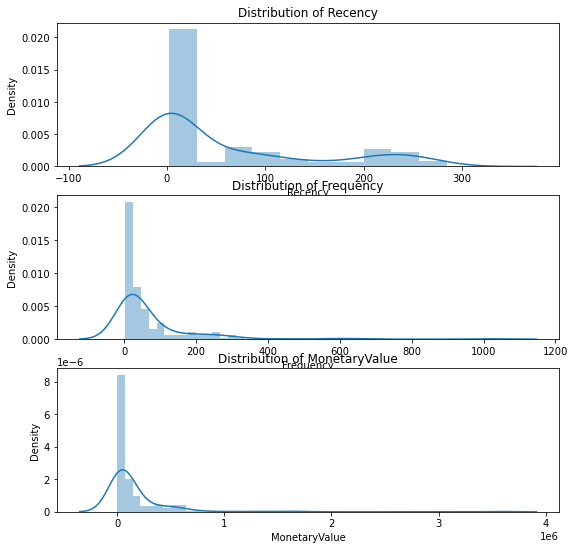

In [23]:
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(Univ_num,'Recency')
plt.subplot(3, 1, 2)
check_skew(Univ_num,'Frequency')
plt.subplot(3, 1, 3)
check_skew(Univ_num,'MonetaryValue')


Normalize the values

In [21]:
#Removing Skewness
df_rfm_log = np.log(Univ_num)

In [22]:
## Function to check skewness
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: 0.5032504491659885, : SkewtestResult(statistic=2.9547366887798567, pvalue=0.0031293600912372637)
Frequency's: Skew: -0.048870662730500815, : SkewtestResult(statistic=-0.30182823252158597, pvalue=0.7627830075426971)


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MonetaryValue's: Skew: -0.37057837205613325, : SkewtestResult(statistic=-2.224253018442685, pvalue=0.026131425731922207)


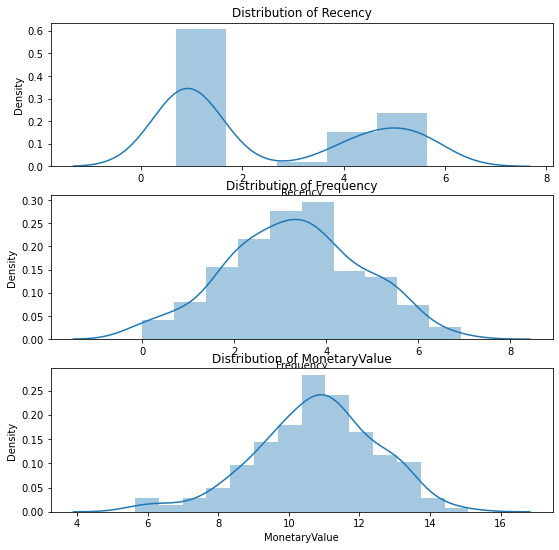

In [26]:
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')
plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')


In [22]:
# scale data
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_norm= scaler.transform(df_rfm_log)
df_norm = pd.DataFrame(df_norm, columns = df_rfm_log.columns)
df_norm.head()

,MonetaryValue,Frequency,Recency,Lifetime
0,1.277300,1.330597,-0.902163,0.411699
1,0.211215,0.194697,-0.809165,0.016590
2,0.472427,0.509480,-0.644074,0.394233
3,1.459557,1.562118,-0.888856,0.661468
4,-0.177353,-0.452268,0.491799,-0.121367


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'total_within_SS')

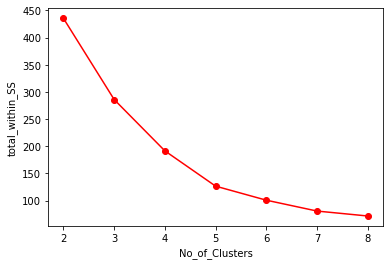

In [28]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2,9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS
# Scree plot (elbow curve)
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [23]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(df_norm)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [24]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust'] = mb # creating a  new column and assigning it to new column 

C:\Users\Acer\AppData\Local\Temp\ipykernel_6552\2535878820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Univ['clust'] = mb # creating a  new column and assigning it to new column


In [25]:
Univ.rename(columns={'clust': 'CreditScore'}, inplace=True)
#Univ = Univ.iloc[:, [5,0,1,2,3,4]]
Univ.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6552\1652505865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Univ.rename(columns={'clust': 'CreditScore'}, inplace=True)


,retailer_names,MonetaryValue,Frequency,Recency,Lifetime,CreditScore
0,RetailerID1,421557.97,189,2.065278,337.479167,0
1,RetailerID10,68787.08,36,2.480556,316.497222,3
2,RetailerID100,107256.37,57,3.434028,336.522917,3
3,RetailerID101,574727.13,265,2.120139,351.454861,0
4,RetailerID102,35524.84,14,32.186806,309.482639,4


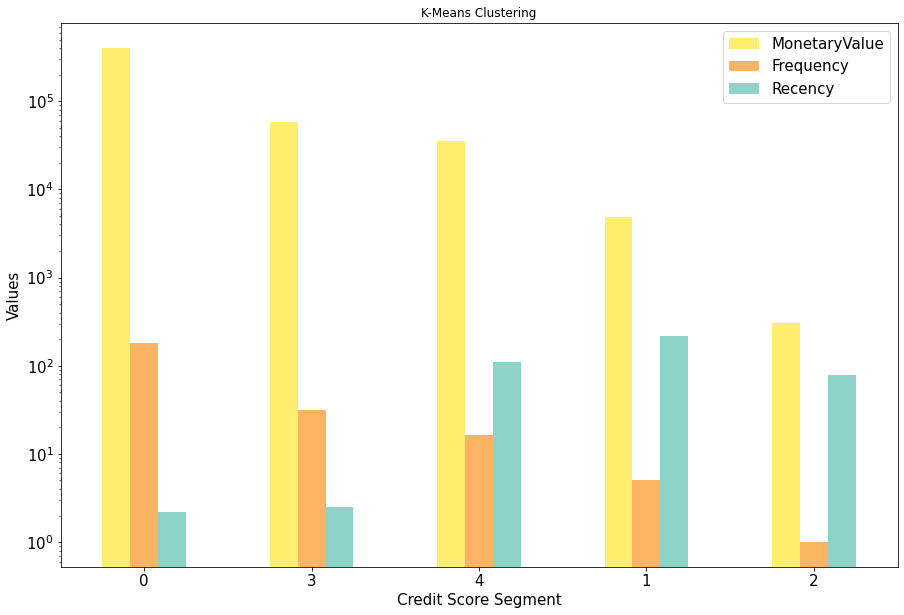

In [26]:
grouped_Univ = Univ[['retailer_names', 'MonetaryValue', 'Frequency', 'Recency',
       'CreditScore']].groupby('CreditScore').median()
grouped_Univ.sort_values(['MonetaryValue'], ascending=False,inplace=True)
myfig = grouped_Univ.plot(kind='bar',logy=True, colormap='Set3_r', fontsize=15, figsize=(15,10)) 
#plt.legend(bbox_to_anchor=(x,y))  
#plt.yticks(rotation=0)
plt.title("K-Means Clustering")
#plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Credit Score Segment', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.legend(fontsize=15) # using a size in points
#plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12) 
plt.show()

In [28]:
# Rename clusters with credit score segment
Univ.loc[Univ['CreditScore'] == 0,'CreditScore'] ='01. Excellent'
Univ.loc[Univ['CreditScore'] == 3,'CreditScore'] ='02. Good'
Univ.loc[Univ['CreditScore'] == 4,'CreditScore'] ='03. Moderate'
Univ.loc[Univ['CreditScore'] == 1,'CreditScore'] ='04. Fair'
Univ.loc[Univ['CreditScore'] == 2,'CreditScore'] ='05. Poor'

C:\Users\Acer\AppData\Local\Temp\ipykernel_6552\3211324422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Univ.loc[Univ['CreditScore'] == 0,'CreditScore'] ='01. Excellent'


In [29]:
Univ.pivot_table(index=["CreditScore"], 
                          values=["Recency", "Frequency", "MonetaryValue", "Lifetime"], 
                          aggfunc={"Recency": [np.min, np.median, np.max], 
                                   "Frequency": [np.min, np.median, np.max], 
                                   "MonetaryValue": [np.min, np.median, np.max], 
                                   "Lifetime": [np.min, np.median, np.max, "count"]})

Frequency                Lifetime                                \
                   amax amin median        amax        amin count      median   
CreditScore                                                                     
01. Excellent      1022   74  180.0  352.322917  317.390278    55  348.587500   
02. Good             59    4   31.5  352.322917  263.547917    74  316.491319   
03. Moderate         77    7   16.5  352.322917  285.529861    48  314.375000   
04. Fair              9    1    5.0  336.264583  216.000000    36  284.468403   
05. Poor              1    1    1.0   93.199306   64.538194     2   78.868750   

              MonetaryValue                            Recency             \
                       amax       amin      median        amax       amin   
CreditScore                                                                 
01. Excellent    3562912.89  117631.62  402308.790   32.436111   2.000000   
02. Good          178500.88    5614.12   58261.915    3.661806   2.120139   
03. Moderate      187520.97    9862.04   35502.560  254.425694  32.172222   
04. Fair           21175.44     425.42    4924.910  284.584722   2.552083   
05. Poor             336.00     281.00     308.500   93.199306  64.538194   

                           
                   median  
CreditScore                
01. Excellent    2.190972  
02. Good         2.526389  
03. Moderate   109.275000  
04. Fair       215.542014  
05. Poor        78.868750

In [30]:
Univ.head()

,retailer_names,MonetaryValue,Frequency,Recency,Lifetime,CreditScore
0,RetailerID1,421557.97,189,2.065278,337.479167,01. Excellent
1,RetailerID10,68787.08,36,2.480556,316.497222,02. Good
2,RetailerID100,107256.37,57,3.434028,336.522917,02. Good
3,RetailerID101,574727.13,265,2.120139,351.454861,01. Excellent
4,RetailerID102,35524.84,14,32.186806,309.482639,03. Moderate


In [52]:
segment1 = Univ.loc[Univ.CreditScore == '01. Excellent'].reset_index()
segment2 = Univ.loc[Univ.CreditScore == '02. Good'].reset_index()
segment3 = Univ.loc[Univ.CreditScore == '03. Moderate'].reset_index()
segment4 = Univ.loc[Univ.CreditScore == '04. Fair'].reset_index()
segment5 = Univ.loc[Univ.CreditScore == '05. Poor'].reset_index()

fsegment01 = clean_credit.merge(right=segment1, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment02 = clean_credit.merge(right=segment2, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment03 = clean_credit.merge(right=segment3, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment04 = clean_credit.merge(right=segment4, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment05 = clean_credit.merge(right=segment5, how="inner", left_on="retailer_names", right_on="retailer_names")

In [45]:
fsegment01 = clean_credit.merge(right=segment1, how="inner", left_on="retailer_names", right_on="retailer_names")

In [31]:
final_cluster = clean_credit.merge(right=Univ, how="inner", left_on="retailer_names", right_on="retailer_names")
final_cluster.head(3)

,Unnamed: 0,master_order_id,master_order_status,created,order_id,order_status,ordereditem_quantity,prod_names,ordereditem_unit_price_net,ordereditem_product_id,...,created_year,created_month,created_hour,created_year_month,created_dayofweek,MonetaryValue,Frequency,Recency,Lifetime,CreditScore
0,1,25651,delivered,2017-12-18 10:41:00,25651,delivered,5,ProdName1,43.00,1744.0,...,2017,12,10,2017_12,0,127477.66,77,2.552083,352.322917,01. Excellent
1,2,25651,delivered,2017-12-18 10:41:00,25651,delivered,5,ProdName2,35.54,965.0,...,2017,12,10,2017_12,0,127477.66,77,2.552083,352.322917,01. Excellent
2,143,25684,processed,2018-01-23 06:30:00,25688,processed,2,ProdName118,48.29,1728.0,...,2018,1,6,2018_01,1,127477.66,77,2.552083,352.322917,01. Excellent


In [32]:
# create excel writer object
writer = pd.ExcelWriter('final_cluster.xlsx')
# write dataframe to excel
final_cluster.to_excel(writer)
# save the excel
writer.save()

#### Retailers ordering from multiple locations

In [84]:
shop05 = pd.pivot_table(fsegment05, index = 'retailer_names', columns = 'group' , values = 'created', aggfunc ='count')
#shop04.sort_values(['Hyderabad'], ascending=False,inplace=True)
test05 = shop05.reset_index()

In [86]:
shop05

group,Gurugram
retailer_names,
RetailerID172,1
RetailerID210,1


In [83]:
len(test04.loc[(test04.isna().sum(axis=1)) == 2])

16

In [77]:
(len(shop03.dropna())/len(shop03))*100

9.615384615384617

In [82]:
len(shop04.dropna())

0

## Is there correlation between RFM Values?

In [ ]:
# Visualise segments using 3D plot
x = customer_data["RelRecency"]
y = customer_data["RelFrequency"]
z = (customer_data["RelMonetaryValue"] - customer_data["RelMonetaryValue"].min()) / customer_data["RelMonetaryValue"].max()
c = customer_data["RFM"]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x, ys=y, zs=z, c=c, s=30, alpha=0.5)
ax.set_title("RFM Visualisation")
ax.set_xlabel("Relative Recency")
ax.set_ylabel("Relative Frequency")
ax.set_zlabel("Relative Monetary Value (with Min-Max Standardisation)")
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(5, 15))
fig.suptitle('Correlation between R, F and M')

axs[0].scatter(x, y, alpha=0.5) # alpha for transparency of plot
axs[0].set_title("Relative Recency (x) vs Relative Frequency (y)")

axs[1].scatter(y, z, alpha=0.5)
axs[1].set_title("Relative Frequency (x) vs Relative Monetary Value (y)")

axs[2].scatter(x, z, alpha=0.5)
axs[2].set_title("Relative Recency (x) vs Relative Monetary Value (y)")

# higher frequency give higher monetary value

In [ ]:
# Visualise segments using 3D plot
x = customer_data["Recency"]
y = customer_data["Frequency"]
z = (customer_data["MonetaryValue"] - customer_data["MonetaryValue"].min()) / customer_data["MonetaryValue"].max()
c = customer_data["RFM"]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x, ys=y, zs=z, c=c, s=30, alpha=0.5)
ax.set_title("RFM Visualisation")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value (with Min-Max Standardisation)")
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(5, 15))
fig.suptitle('Correlation between R, F and M')

axs[0].scatter(x, y, alpha=0.5) # alpha for transparency of plot
axs[0].set_title("Recency (x) vs Frequency (y)")

axs[1].scatter(y, z, alpha=0.5)
axs[1].set_title("Frequency (x) vs Monetary Value (y)")

axs[2].scatter(x, z, alpha=0.5)
axs[2].set_title("Recency (x) vs Monetary Value (y)")

# higher frequency give higher monetary value

In [ ]:
sns.regplot(x=customer_data['Frequency'],y=customer_data['MonetaryValue'])

In [ ]:
sns.relplot(x="Frequency", y="MonetaryValue", data=customer_data, kind = 'scatter')

In [ ]:
import seaborn as sns
sns.pairplot(customer_data.iloc[:,[0,3,4]])
                             
# Correlation matrix 
#cars.corr()

In [ ]:
np.corrcoef(customer_data.Frequency, customer_data.Recency) 

In [ ]:

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('customer2.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
customer_data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
house = customer_data.iloc[:,[0,3,4]]
house.head(3)

In [ ]:
correlation_matrix = house.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# From these statistics we can generate some heuristic business rules to simplify our segmentation.
# For example, RFM score 3 and 4 can be combined, because these two groups tend to have only one transaction.
# Create new columns with our learnings
customer_data.describe()


In [ ]:
rfm_rel

In [29]:
customer_data["last_order_within_4d"] = customer_data["Recency"]<4 # Had transactions in the last 4 days
customer_data["more_than_26_orders"] = customer_data["Frequency"]>26 # made more than 26 orders
customer_data["value_higher_than_400k"] = customer_data["MonetaryValue"]>400000 # Sum of value higher than 180K
customer_data.groupby(["last_order_within_4d", "more_than_26_orders", "value_higher_than_400k"]).count()["Lifetime"]

last_order_within_4d  more_than_26_orders  value_higher_than_400k
False                 False                False                     72
                      True                 False                     13
                                           True                       1
True                  False                False                     34
                      True                 False                     68
                                           True                      27
Name: Lifetime, dtype: int64

In [67]:
conditions = [
    (customer_data["last_order_within_4d"]==True)&(customer_data["more_than_26_orders"]==True)&(customer_data["value_higher_than_400k"]==True),
    (customer_data["last_order_within_4d"]==True)&(customer_data["more_than_26_orders"]==True)&(customer_data["value_higher_than_400k"]==False),
    (customer_data["last_order_within_4d"]==False)&(customer_data["more_than_26_orders"]==True),
    (customer_data["last_order_within_4d"]==True)&(customer_data["more_than_26_orders"]==False),
    (customer_data["last_order_within_4d"]==False)&(customer_data["more_than_26_orders"]==False)
]
mappings = ["01. High Engagement & High Value", 
            "02. High Engagement & Low Value", 
           "03. High Frequency but Recently Inactive", 
              "04. Low Frequency but Recently Active", 
            "05. Low Engagement & Low Value"]
customer_data['FinalRFM'] = np.select(conditions, mappings, default="Others")
customer_data['FinalRFM'].value_counts()



05. Low Engagement & Low Value              72
02. High Engagement & Low Value             68
04. Low Frequency but Recently Active       34
01. High Engagement & High Value            27
03. High Frequency but Recently Inactive    14
Name: FinalRFM, dtype: int64

In [68]:
customer_data.pivot_table(index=["FinalRFM"], 
                          values=["Recency", "Frequency", "MonetaryValue", "Lifetime"], 
                          aggfunc={"Recency": [np.min, np.median, np.max], 
                                   "Frequency": [np.min, np.median, np.max], 
                                   "MonetaryValue": [np.min, np.median, np.max], 
                                   "Lifetime": [np.min, np.median, np.max, "count"]})

Frequency                Lifetime  \
                                              amax amin median        amax   
FinalRFM                                                                     
01. High Engagement & High Value              1022  180  261.0  351.484722   
02. High Engagement & Low Value                198   29   54.0  352.322917   
03. High Frequency but Recently Inactive       165   27   35.5  351.436806   
04. Low Frequency but Recently Active           26    2   16.5  337.513194   
05. Low Engagement & Low Value                  25    1    7.5  352.322917   

                                                                        \
                                                amin count      median   
FinalRFM                                                                 
01. High Engagement & High Value          336.450694    27  348.587500   
02. High Engagement & Low Value           295.575694    68  337.378472   
03. High Frequency but Recently Inactive  309.439583    14  326.235764   
04. Low Frequency but Recently Active     216.000000    34  309.948958   
05. Low Engagement & Low Value             64.538194    72  304.823611   

                                         MonetaryValue                         \
                                                  amax       amin      median   
FinalRFM                                                                        
01. High Engagement & High Value            3562912.89  402308.79  574727.130   
02. High Engagement & Low Value              364510.71   37326.46  106643.145   
03. High Frequency but Recently Inactive     458681.75   36496.14   82842.475   
04. Low Frequency but Recently Active         74577.47    4801.71   23371.020   
05. Low Engagement & Low Value                55148.01     281.00   11469.985   

                                             Recency                         
                                                amax       amin      median  
FinalRFM                                                                     
01. High Engagement & High Value            2.475694   2.000000    2.068750  
02. High Engagement & Low Value             3.661806   2.000000    2.510417  
03. High Frequency but Recently Inactive  215.613889  32.436111   64.030903  
04. Low Frequency but Recently Active       3.570139   2.120139    2.531944  
05. Low Engagement & Low Value            284.584722  32.172222  186.502778

 I had concerns about the impact of customer life time on frequency and recency, and the impact of outliers in my monetary values.

- **High Engagement & High Value (27)** are those who had their last transactions in the last 4 days, made more than 26 transactions, and contributed more than 600K on average.
- **High Engagement & Low Value (68)** are those who are as active as Group1 and contributed less than 600K.
- **Recent Activity & Low Frequency (34)** are those who had their last transactions in the last 4 days but made no more than 26 transactions. These customers also have a lower monetary value..
- **“Old” Activity & High Frequency (14)** are those who did not have any transactions in the last 4 days. However, on average they had more than 26 transactions. These customers were very active at the beginning of their journey but are not that active recently. We need to find ways to reengage them.
- **Low Engagement & Low Value (72)** are those who did not have any transactions in the last 4 days, made no more than 26 transactions, and contributed the lowest revenue. Apparently, several customers in this group are recently acquired customers (their average lifetime is less than 100 days) but only made 1 transaction.
 

In [ ]:
cust = customer_data.reset_index()

<AxesSubplot:>

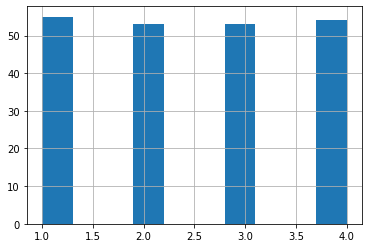

In [34]:
customer_data['FrequencyScore'].hist()

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('fsegment05.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
all_data.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [82]:
grouped_Univ = all_data[['retailer_names', 'MonetaryValue', 'Frequency', 'Recency',
       'FinalRFM']].groupby('FinalRFM').median()
grouped_Univ.sort_values(['MonetaryValue'], ascending=False,inplace=True)


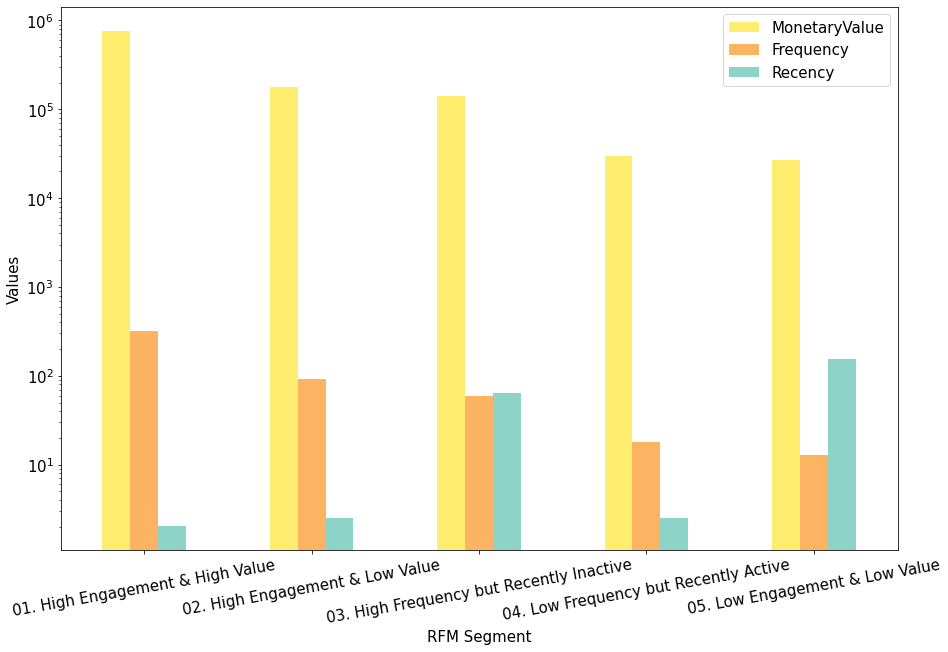

In [88]:
#plt.figure(figsize=(25,20))
grouped_Univ = all_data[['retailer_names', 'MonetaryValue', 'Frequency', 'Recency',
       'FinalRFM']].groupby('FinalRFM').median()
grouped_Univ.sort_values(['MonetaryValue'], ascending=False,inplace=True)
myfig = grouped_Univ.plot(kind='bar',logy=True, colormap='Set3_r', fontsize=15, figsize=(15,10)) 
#plt.legend(bbox_to_anchor=(x,y))  
#plt.yticks(rotation=0)
plt.xticks(rotation=10)
plt.xlabel('RFM Segment', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.legend(fontsize=15) # using a size in points
#plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12) 
plt.show()



You can now start to analyze the characteristics and purchasing behavior of this group and try to understand what distinguishes them from typical customers. Do they tend to buy a subset of your products or services? Do they live in demographically similar neighborhoods? Are their lifestyles and/or life stages similar? Why do they perceive more value in your business than the folks who you see once or twice?

In [35]:
segment1 = customer_data.loc[customer_data.CreditScore == '01. Excellent'].reset_index()
segment2 = customer_data.loc[customer_data.CreditScore == '02. Good'].reset_index()
segment3 = customer_data.loc[customer_data.CreditScore == '03. Moderate'].reset_index()
segment4 = customer_data.loc[customer_data.CreditScore == '04. Fair'].reset_index()
segment5 = customer_data.loc[customer_data.CreditScore == '05. Poor'].reset_index()

fsegment01 = clean_credit.merge(right=segment1, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment02 = clean_credit.merge(right=segment2, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment03 = clean_credit.merge(right=segment3, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment04 = clean_credit.merge(right=segment4, how="inner", left_on="retailer_names", right_on="retailer_names")
fsegment05 = clean_credit.merge(right=segment5, how="inner", left_on="retailer_names", right_on="retailer_names")

In [69]:
all_data = clean_credit.merge(right=customer_data, how="inner", left_on="retailer_names", right_on="retailer_names")
all_data.head(3)

,Unnamed: 0,master_order_id,master_order_status,created,ordereditem_quantity,prod_names,ordereditem_unit_price_net,value,group,retailer_names,...,RelMonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM,last_order_within_4d,more_than_26_orders,value_higher_than_400k,CreditScore,FinalRFM
0,1,25651,delivered,2017-12-18 10:41:00,5,ProdName1,43.00,215.00,Hyderabad,RetailerID2,...,361.820517,3,3,3,9,True,True,False,02. Good,02. High Engagement & Low Value
1,2,25651,delivered,2017-12-18 10:41:00,5,ProdName2,35.54,177.70,Hyderabad,RetailerID2,...,361.820517,3,3,3,9,True,True,False,02. Good,02. High Engagement & Low Value
2,143,25684,processed,2018-01-23 06:30:00,2,ProdName118,48.29,96.58,Hyderabad,RetailerID2,...,361.820517,3,3,3,9,True,True,False,02. Good,02. High Engagement & Low Value


In [ ]:
myFigure = sns.catplot(
    x="FinalRFM", y="survived", hue="class", kind="bar",
    hue_order=["First", "Second", "Third"], data=all_data)
myFigure.fig.suptitle("Titanic Survivors", fontsize=15)

In [33]:
# create excel writer object
writer = pd.ExcelWriter('rel_all_data2.xlsx')
# write dataframe to excel
rel_all_data.to_excel(writer)
# save the excel
writer.save()

In [ ]:
segment5

In [ ]:
all_data_shop = pd.pivot_table(all_data, index = ['retailer_names','FinalRFM'], columns = 'group' , values = 'created', aggfunc ='count')
all_data_shop.sort_values(['Hyderabad'], ascending=False,inplace=True)


In [ ]:
all_data_shop

In [ ]:
all_group = all_data_shop.reset_index()

In [ ]:
all_group

In [ ]:
all_group.pivot_table(index="FinalRFM", 
                                              values=["created", "bill_amount",'invoice_id'], 
                                              aggfunc={"created": [min, max], "bill_amount": sum, 'invoice_id':pd.Series.nunique})



customer_data.head()

In [ ]:
all_group.loc[(all_group.isna().sum(axis=1)) == 1]

In [ ]:
null_group = all_group[all_group.isnull().any(axis=1)]
null_group

In [ ]:
null_group.groupby('FinalRFM')['retailer_names'].count()


### Most Valuable Customer - High engagement & High value (27)

In [58]:
fsegment01.shape

(11298, 36)

In [57]:
shop = pd.pivot_table(fsegment01, index = 'retailer_names', columns = 'group' , values = 'created', aggfunc ='count')
shop.sort_values(['Hyderabad'], ascending=False,inplace=True)
shop.shape

C:\Users\Acer\AppData\Local\Temp\ipykernel_6376\2598173587.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  shop = pd.pivot_table(fsegment01, index = 'retailer_names', columns = 'bill_amount' , values = 'created', aggfunc ='sum')


bill_amount
retailer_names
RetailerID1
RetailerID101
RetailerID115
RetailerID119
RetailerID123
RetailerID127
RetailerID13
RetailerID133
RetailerID146


Number of transactions made by each retailers by group. All the retailers have pharmacy outlets in all the locations

#### Market basket analysis

Top 20 items ordered

In [ ]:
myfig = grouped_Univ.plot(kind='bar',logy=False, colormap='Set3_r',figsize=(15,10), fontsize=15) 
#plt.legend(bbox_to_anchor=(x,y))  
#plt.yticks(rotation=0)
plt.xticks(rotation=0, weight = 'bold')
plt.xlabel('RFM Cluster', fontsize=15)
plt.ylabel('Average RFM Scores', fontsize=15)
plt.legend(fontsize=15) # using a size in points
#plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12) 
plt.show()

In [ ]:
fsegment01['prod_names'].value_counts().head(10).plot(kind = 'barh',colormap='Accent_r',figsize=(15,10))


In [ ]:
basket01 = (fsegment01
        .groupby(['invoice_id', 'prod_names'])['ordereditem_quantity']
                .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_id'))

In [ ]:
basket01

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [ ]:
basket01_sets = basket01.applymap(encode_units)

In [ ]:
#we can generate frequent item sets that have a support of at least 10 occurence in 10000 transactions
frequent01_itemsets = apriori(basket01_sets, min_support=0.001, use_colnames=True)
frequent01_itemsets.sort_values('support', ascending = False, inplace=True)

In [ ]:
#generate the rules with their corresponding support, confidence and lift
#rules_h = association_rules(frequent_itemsets_h, metric="lift", min_threshold=1)
rules01 = association_rules(frequent01_itemsets, metric="lift")
rules01.head()

#In this case, look for a large lift (6) and high confidence (.8):
#rules_h[ (rules_h['lift'] >= 6) &
     #  (rules_h['confidence'] >= 0.8) ]

In [ ]:
import matplotlib.pyplot as plt
colors = ["red","green","blue","black","yellow","magenta","cyan", "pink","orange","brown"]
plt.bar(x = list(range(1,21)), height = frequent01_itemsets.support[1:21], color=colors)
plt.xticks(list(range(1,21)),frequent01_itemsets.itemsets[1:21],rotation = 45)
plt.xlabel('item-sets');plt.ylabel('support')
#plt.xticks(rotation = 45)

#### Efficient retailers with completed customer order status comes from efficient manufacturer

In [ ]:
delivery = fsegment01.groupby('retailer_names')['order_status','master_order_status'].apply(lambda x: (x=='processed').sum())

Relationship between manufacturer and retailer. More completed order from manufacturer means more completed order from retailer

In [ ]:
sns.relplot(x="master_order_status", y="order_status", kind="line", 
            dashes=False,markers = True, data=delivery)

In [ ]:
# each month brapa retailer yg restock (unique) --> almost every retailers restock
fsegment01.groupby('created_year_month')['retailer_names'].nunique().plot.bar()

In [ ]:
fsegment01.groupby('created_year_month')['retailer_names'].nunique().plot.bar()

In [ ]:
myFigure = fsegment01.groupby('created_dayofweek')['retailer_names'].nunique().plot(kind='bar')
myFigure.set_xticklabels(labels=["Mon", "Tue",'Wed','Thu','Fri','Sat','Sun'])
#myFigure.fig
plt.show()

In [ ]:
invoiceno_hour = fsegment01.groupby('created_hour')['invoice_id'].nunique()
invoiceno_hour.index
invoiceno_hour.plot.bar()

# the highest number of orders are at 6am

<AxesSubplot:>

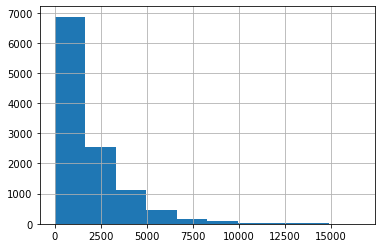

In [52]:
fsegment01['bill_amount'].hist()

#### How many different products they ordered

In [ ]:
# brapa jenis produk diorang beli
monopoly01 = fsegment01.groupby('retailer_names')['prod_names'].nunique().reset_index()
monopoly01.describe()

### Silver

In [ ]:
shop02 = pd.pivot_table(fsegment02, index = 'retailer_names', columns = 'group' , values = 'created', aggfunc ='count')
shop02.sort_values(['Hyderabad'], ascending=False,inplace=True)
shop02
test02 = shop02.reset_index()

In [ ]:
test02

In [ ]:
len(shop02)

In [ ]:
len(test02.loc[(test02.isna().sum(axis=1)) == 1])

In [ ]:
len(test02.isna().sum(axis=1) > 2)

In [ ]:
(len(shop02.dropna())/len(shop02))*100 #40 percent of retailers with outlets in all three group

In [ ]:
#len(test02[(test02['Delhi-West'] == np.nan)])
test02['Gurugram'].isna().sum()

#### Market basket Analysis

In [ ]:
fsegment02['prod_names'].value_counts().head(20).plot.bar()

In [ ]:
basket02 = (fsegment02
        .groupby(['invoice_id', 'prod_names'])['ordereditem_quantity']
                .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_id'))

In [ ]:
basket02_sets = basket02.applymap(encode_units)
basket02_sets

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
#we can generate frequent item sets that have a support of at least 10 occurence in 10000 transactions
frequent02_itemsets = apriori(basket02_sets, min_support=0.001, use_colnames=True)
frequent02_itemsets.sort_values('support', ascending = False, inplace=True)


In [ ]:
rules02 = association_rules(frequent02_itemsets, metric="lift")
rules02.head()

In [ ]:
import matplotlib.pyplot as plt
colors = ["red","green","blue","black","yellow","magenta","cyan", "pink","orange","brown"]
plt.bar(x = list(range(1,21)), height = frequent02_itemsets.support[1:21], color=colors)
plt.xticks(list(range(1,21)),frequent02_itemsets.itemsets[1:21],rotation = 45)
plt.xlabel('item-sets');plt.ylabel('support')

In [ ]:
# less product ordered
monopoly02 = fsegment02.groupby('retailer_names')['prod_names'].nunique().reset_index()
monopoly02.describe()

In [ ]:
monopoly02.loc[monopoly02["prod_names"] == 1]

In [ ]:
delivery02 = fsegment02.groupby('retailer_names')['order_status','master_order_status'].apply(lambda x: (x=='processed').sum())
# Relationship between manufacturer and retailer. More completed order from manufacturer means more completed order from retailer
sns.relplot(x="master_order_status", y="order_status", kind="line", 
             data=delivery02)

In [ ]:
# each month brapa retailer yg restock (unique) --> almost every retailers restock
fsegment02.groupby('created_year_month')['retailer_names'].nunique().plot.bar()

In [ ]:
myFigure = fsegment02.groupby('created_dayofweek')['retailer_names'].nunique().plot(kind='bar')
myFigure.set_xticklabels(labels=["Mon", "Tue",'Wed','Thu','Fri','Sat','Sun'])
#myFigure.fig
plt.show()


In [ ]:
invoiceno_hour = fsegment02.groupby('created_hour')['invoice_id'].nunique()
invoiceno_hour.index
invoiceno_hour.plot.bar()

# the highest number of orders are at 6am

### Recent and low frequency (62)

In [ ]:
fsegment03.shape

In [ ]:
shop03 = pd.pivot_table(fsegment03, index = 'retailer_names', columns = 'group' , values = 'created', aggfunc ='count')
shop03.sort_values(['Hyderabad'], ascending=False,inplace=True)
shop03

In [ ]:
test03 = shop03.reset_index()

In [ ]:
len(shop03)

In [ ]:
len(test03.loc[(test03.isna().sum(axis=1)) == 2])

In [ ]:
(len(shop03.dropna())/len(shop03))*100 # only 21% of retailers with outlets in all three group

#### Market Basket Analysis

In [ ]:
fsegment03['prod_names'].value_counts().head(20).plot.bar()

In [ ]:
basket03 = (fsegment03
        .groupby(['invoice_id', 'prod_names'])['ordereditem_quantity']
                .sum().unstack().reset_index().fillna(0)
          .set_index('invoice_id'))

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket03_sets = basket03.applymap(encode_units)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent03_itemsets = apriori(basket03_sets, min_support=0.001, use_colnames=True)
frequent03_itemsets.sort_values('support', ascending = False, inplace=True)

In [ ]:
rules03 = association_rules(frequent03_itemsets, metric="lift")
rules03.head()

In [ ]:
import matplotlib.pyplot as plt
colors = ["red","green","blue","black","yellow","magenta","cyan", "pink","orange","brown"]
plt.bar(x = list(range(1,21)), height = frequent03_itemsets.support[1:21], color=colors)
plt.xticks(list(range(1,21)),frequent03_itemsets.itemsets[1:21],rotation = 45)
plt.xlabel('item-sets');plt.ylabel('support')

In [ ]:
# less product ordered
monopoly03 = fsegment03.groupby('retailer_names')['prod_names'].nunique().reset_index()
monopoly03.head()

In [ ]:
monopoly03.loc[monopoly03["prod_names"] == 1]

In [ ]:
sns.relplot(x='created', y='bill_amount', data=fsegment03, kind='line')

In [ ]:
delivery03 = fsegment03.groupby('retailer_names')['order_status','master_order_status'].apply(lambda x: (x=='processed').sum())
# Relationship between manufacturer and retailer. More completed order from manufacturer means more completed order from retailer
sns.relplot(x="master_order_status", y="order_status", kind="line", 
             data=delivery03)

<AxesSubplot:xlabel='created_year_month'>

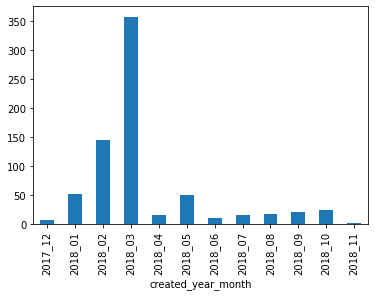

In [49]:
# each month brapa retailer yg restock (unique) --> almost every retailers restock
fsegment03.groupby('created_year_month')['invoice_id'].nunique().plot.bar()

In [ ]:
myFigure = fsegment03.groupby('created_dayofweek')['retailer_names'].nunique().plot(kind='bar')
myFigure.set_xticklabels(labels=["Mon", "Tue",'Wed','Thu','Fri','Sat','Sun'])
#myFigure.fig
plt.show()

In [ ]:
invoiceno_hour = fsegment03.groupby('created_hour')['invoice_id'].nunique()
invoiceno_hour.index
invoiceno_hour.plot.bar()

# the highest number of orders are at 6am

In [50]:
fsegment03['bill_amount'].median()

1458.47

In [47]:
f03 = all_data.loc[all_data['CreditScore']=='03. Moderate']

In [48]:
f03['created'].max()

Timestamp('2018-11-03 07:58:00')

<AxesSubplot:>

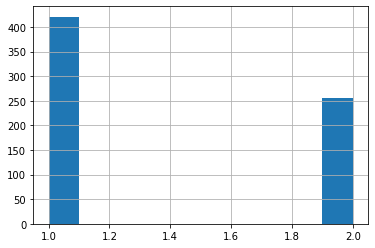

In [42]:
fsegment05['RecencyScore'].hist()

### promising

In [ ]:
# each month brapa retailer yg restock (unique) --> almost every retailers restock
fsegment04.groupby('created_year_month')['retailer_names'].nunique().plot.bar()

In [ ]:
fsegment04['created'].max()

In [ ]:
shop04 = pd.pivot_table(fsegment04, index = 'retailer_names', columns = 'group' , values = 'created', aggfunc ='count')
shop04.sort_values(['Hyderabad'], ascending=False,inplace=True)
shop04

In [ ]:
(len(shop04.dropna())/len(shop04))*100 # only 8% of retailers with outlets in all three group

In [ ]:
len(shop04)

In [ ]:
test04 = shop04.reset_index()

In [ ]:
len(test04.loc[(test04.isna().sum(axis=1)) == 1])

In [ ]:
fsegment04['prod_names'].value_counts().head(10).plot.bar()

In [ ]:
# less product ordered
monopoly04 = fsegment04.groupby('retailer_names')['prod_names'].nunique().reset_index()
monopoly04.head()

In [ ]:
monopoly04.loc[monopoly04["prod_names"] == 1]

### 05. dropout (72)

In [ ]:
# each month brapa retailer yg restock (unique) --> almost every retailers restock
fsegment05.groupby('created_year_month')['retailer_names'].nunique().plot.bar()

In [ ]:
# less product ordered
monopoly05 = fsegment05.groupby('retailer_names')['prod_names'].nunique().reset_index()
monopoly05.head()

In [ ]:
monopoly05.loc[monopoly05["prod_names"] == 1]

In [ ]:
shop05 = pd.pivot_table(fsegment05, index = 'retailer_names', columns = 'group' , values = 'created', aggfunc ='count')
shop05.sort_values(['Hyderabad'], ascending=False,inplace=True)
shop05

In [ ]:
len(test05.loc[(test05.isna().sum(axis=1)) == 2])

In [ ]:
test05 = shop05.reset_index()

In [ ]:
len(shop05)

In [ ]:
(len(shop05.dropna())/len(shop05))*100 # only 4% of retailers with outlets in all three group

In [ ]:
# barplot
import seaborn as sns
sns.countplot(x="clust", data=Univ)
plt.show()
# KIRA SETIAP CLUSTER ADA BRAPA NEGARA
Univ.clust.value_counts()
# Joint Plot ikut cluster untuk numerical variable je
plt.figure(figsize=(30,25))
grouped_Univ = Univ[['retailer_names', 'MonetaryValue', 'Frequency', 'Recency',
       'Lifetime','clust']].groupby('clust').mean()
axes = grouped_Univ.plot.bar(subplots=True)
plt.show()

# Profiling all features together
grouped_Univ1.plot(kind='bar', colormap='Accent')    
grouped_Univ1.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()